In [1]:
!pip install pandas matplotlib seaborn wordcloud


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
ner_df = pd.read_csv("../data/constitution_ner.csv")
topic_df = pd.read_csv("../data/constitution_topics.csv")
class_df = pd.read_csv("../data/constitution_sentence_classification.csv")

ner_df.head(), topic_df.head(), class_df.head()


(                                            sentence                 entity  \
 0  £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...                     IN   
 1  £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...                  ##DIA   
 2  £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...                     IN   
 3  £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...                  ##DIA   
 4  £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...  Constitution of India   
 
   label     score  
 0   LOC  0.998268  
 1   LOC  0.811350  
 2   LOC  0.997714  
 3   LOC  0.771135  
 4  MISC  0.902658  ,
                                             sentence  topic
 0  £ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...      2
 1  In this edition, the text of the Constitution ...      2
 2  The foot notes below the text indicate the Con...      6
 3  The Constitution (One Hundredth Amendment) Act...      2
 4  The Constitution (Application to Jammu and Kas...      2,
                        

In [6]:
print(ner_df.columns)


Index(['sentence', 'entity', 'label', 'score'], dtype='object')


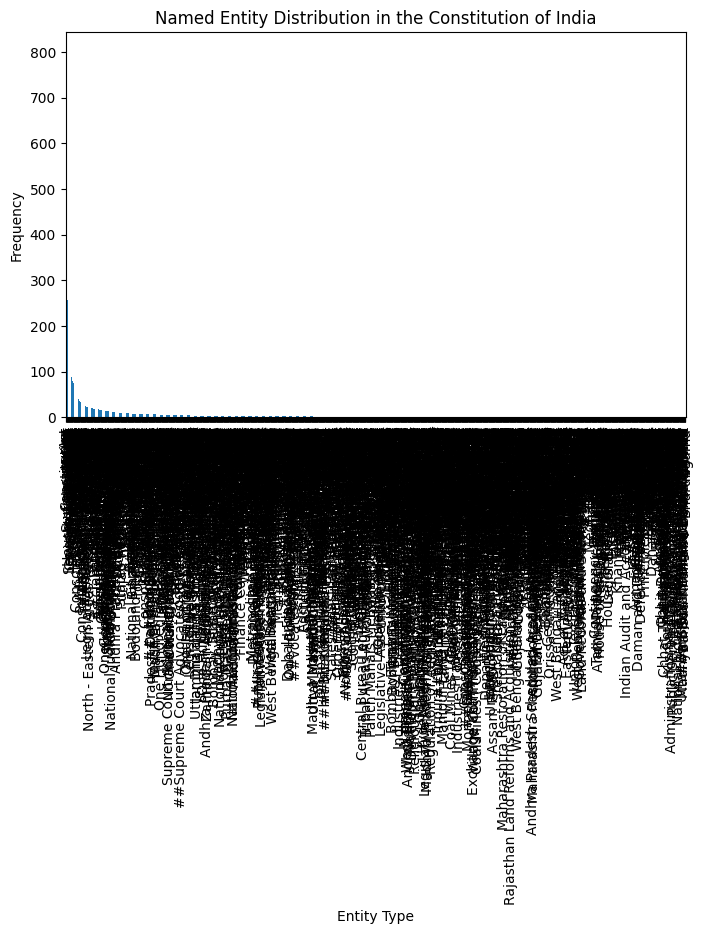

In [7]:
entity_counts = ner_df["entity"].value_counts()

plt.figure(figsize=(8,5))
entity_counts.plot(kind="bar")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Named Entity Distribution in the Constitution of India")
plt.show()

#ORG → Institutions (Parliament, Supreme Court)

#LOC → States, territories

#PER → Constitutional authorities

In [8]:
print(ner_df.columns)
ner_df.head()


Index(['sentence', 'entity', 'label', 'score'], dtype='object')


,sentence,entity,label,score
0,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...",IN,LOC,0.998268
1,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...",##DIA,LOC,0.811350
2,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...",IN,LOC,0.997714
3,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...",##DIA,LOC,0.771135
4,"£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONST...",Constitution of India,MISC,0.902658


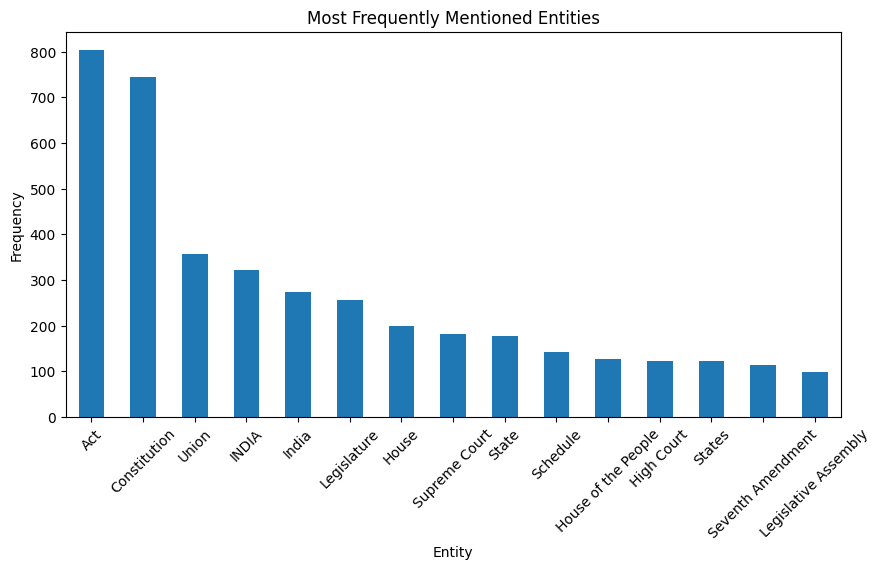

In [9]:
#Top Named Entities (Interpretability)
top_entities = ner_df["entity"].value_counts().head(15)

plt.figure(figsize=(10,5))
top_entities.plot(kind="bar")
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.title("Most Frequently Mentioned Entities")
plt.xticks(rotation=45)
plt.show()



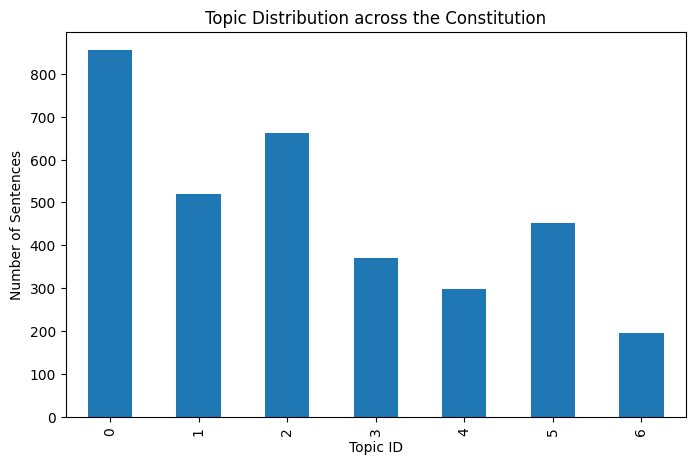

In [10]:
#Topic Distribution Dashboard
topic_counts = topic_df["topic"].value_counts().sort_index()

plt.figure(figsize=(8,5))
topic_counts.plot(kind="bar")
plt.xlabel("Topic ID")
plt.ylabel("Number of Sentences")
plt.title("Topic Distribution across the Constitution")
plt.show()


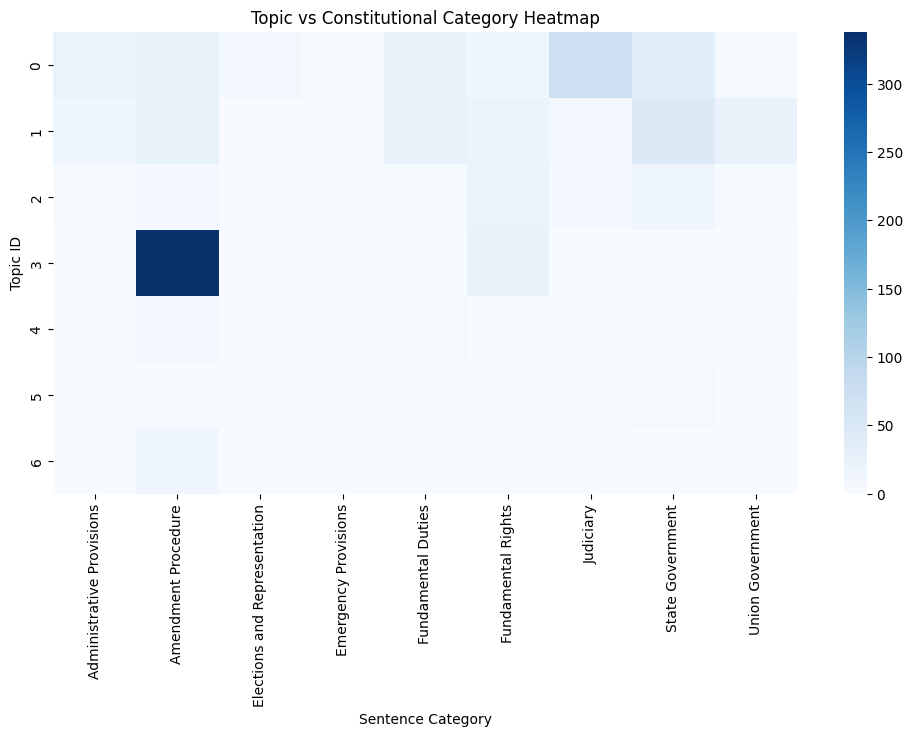

In [11]:
#Topic vs Sentence Classification (Cross-Analysis)
merged_df = topic_df.merge(
    class_df,
    on="sentence",
    how="inner"
)

cross_tab = pd.crosstab(
    merged_df["topic"],
    merged_df["predicted_category"]
)

plt.figure(figsize=(12,6))
sns.heatmap(cross_tab, cmap="Blues")
plt.title("Topic vs Constitutional Category Heatmap")
plt.xlabel("Sentence Category")
plt.ylabel("Topic ID")
plt.show()

#shows how unsupervised topics align with legal categories.


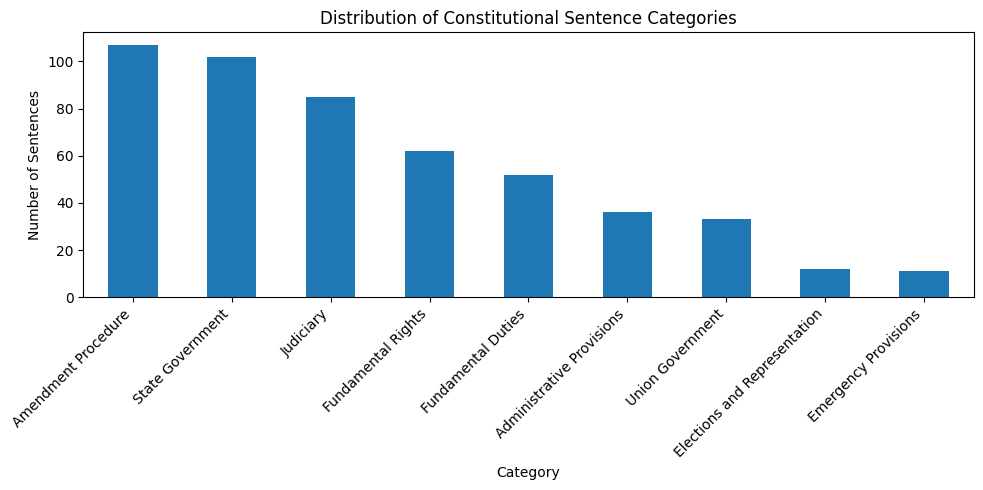

In [12]:
#Sentence Category Distribution
category_counts = class_df["predicted_category"].value_counts()

plt.figure(figsize=(10,5))
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Sentences")
plt.title("Distribution of Constitutional Sentence Categories")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


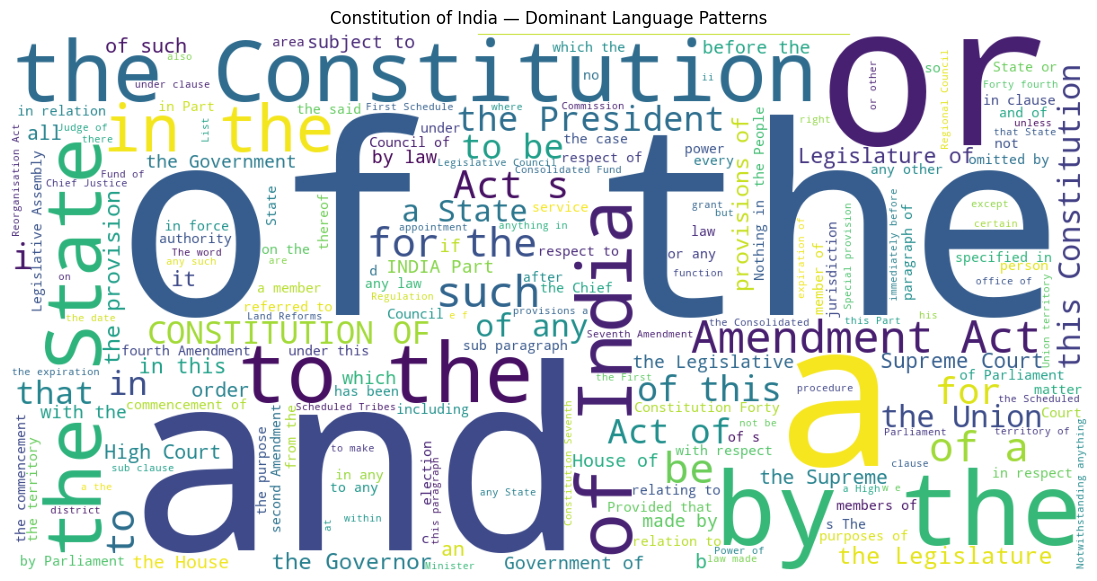

In [14]:
#WordCloud for Constitutional Language
text_blob = " ".join(topic_df["sentence"].sample(1000, random_state=42))

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords={"shall", "may", "article"}
).generate(text_blob)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Constitution of India — Dominant Language Patterns")
plt.show()


Institutional entities dominate the Constitution, reflecting governance focus

Topic modeling reveals latent themes such as judiciary, administration, and amendments

Zero-shot classification aligns well with discovered topics

High confidence scores validate semantic coherence

Visual dashboards make constitutional structure interpretable at scale